# INIT

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Input, Reshape, Flatten
from tensorflow.keras.layers import Dropout, LeakyReLU as LR, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from keras import backend as K

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.vis_utils import plot_model

import itertools
import warnings
import os

from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [ ]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

mugimendua = 0

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
if mugimendua == 0:
  x = np.loadtxt('/content/drive/My Drive/Colab Notebooks/TFG/data/x_posaccgyro.csv', delimiter=',')
  y = np.loadtxt('/content/drive/My Drive/Colab Notebooks/TFG/data/y_posaccgyro.csv', delimiter=',')
elif mugimendua == 1:
  x = np.loadtxt('/content/drive/My Drive/Colab Notebooks/TFG/data/x1.csv', delimiter=',')
  y = np.loadtxt('/content/drive/My Drive/Colab Notebooks/TFG/data/y1.csv', delimiter=',')


x_tia = np.loadtxt('/content/drive/My Drive/Colab Notebooks/TFG/data/test/x_tiaitsaso.csv', delimiter=',')
y_tia = np.loadtxt('/content/drive/My Drive/Colab Notebooks/TFG/data/test/y_tiaitsaso.csv', delimiter=',')
# x_tia, y_tia = shuffle(x_tia, y_tia)
# x = np.concatenate((x, x_tia[:50]))
# y = np.concatenate((y, y_tia[:50]))
# x = np.concatenate((x, generator.predict(np.random.normal(0, 1, (500, 100)))))
# y = np.concatenate((y, model.predict(generator.predict(np.random.normal(0, 1, (500, 100)))).reshape((500,)) > 0.5))

print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (2112, 5940)
y shape: (2112,)


In [ ]:
x, y = shuffle(x, y)

if mugimendua == 0:
  onecount = 500
  zerocount = 500
elif mugimendua == 1:
  onecount = 450
  zerocount = 450
one = y > 0.5
zero = one == False

x_one = x[one][:onecount]
x_one_rest = x[one][onecount:]
y_one = y[one][:onecount]
y_one_rest = y[one][onecount:]

x_zero = x[zero][:zerocount]
x_zero_rest = x[zero][zerocount:]
y_zero = y[zero][:zerocount]
y_zero_rest = y[zero][zerocount:]

x = np.concatenate((x_one, x_zero))
y = np.concatenate((y_one, y_zero))

x, y = shuffle(x, y)

print(np.count_nonzero(y))


max_x = max([max(i) for i in abs(x)])
x_norm = (x / max_x + 1)/2

input_size = x.shape[1]
output_size = 2

split=0.8
split_index = int(x.shape[0]*split)
x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

x_train_norm, x_test_norm = x_norm[:split_index], x_norm[split_index:]
y_train_norm, y_test_norm = y[:split_index], y[split_index:]

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

500
(800, 5940) (200, 5940)
(800,) (200,)


# Common NN

In [ ]:
x_train.shape

(720, 5940)

In [ ]:
input_size = x_train.shape[1]
model = Sequential([
                    Dense(input_size, input_dim=input_size, activation=LR()),
                    Dense(input_size//2, activation=LR()),
                    Dense(input_size//4, activation=LR()),
                    Dense(input_size//8, activation=LR()),
                    Dense(input_size//16, activation=LR()),
                    Dense(35, activation=LR()),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5940)              35289540  
_________________________________________________________________
dense_1 (Dense)              (None, 2970)              17644770  
_________________________________________________________________
dense_2 (Dense)              (None, 1485)              4411935   
_________________________________________________________________
dense_3 (Dense)              (None, 742)               1102612   
_________________________________________________________________
dense_4 (Dense)              (None, 371)               275653    
_________________________________________________________________
dense_5 (Dense)              (None, 35)                13020     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3

Data must be shuffled from the beginning. Not enough to shuffle on fit

In [ ]:
model.compile(optimizer=Nadam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=x_train, y=y_train, validation_split=0.33, batch_size=50, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
10/10 - 1s - loss: 0.6390 - accuracy: 0.7199 - val_loss: 1.0931 - val_accuracy: 0.6387
Epoch 2/20
10/10 - 1s - loss: 3.6331 - accuracy: 0.8361 - val_loss: 0.7483 - val_accuracy: 0.7731
Epoch 3/20
10/10 - 1s - loss: 2.5385 - accuracy: 0.8900 - val_loss: 0.8872 - val_accuracy: 0.7899
Epoch 4/20
10/10 - 1s - loss: 0.2391 - accuracy: 0.9149 - val_loss: 0.9523 - val_accuracy: 0.8151
Epoch 5/20
10/10 - 1s - loss: 0.1680 - accuracy: 0.9544 - val_loss: 1.1013 - val_accuracy: 0.8025
Epoch 6/20
10/10 - 1s - loss: 0.1291 - accuracy: 0.9606 - val_loss: 1.0730 - val_accuracy: 0.8235
Epoch 7/20
10/10 - 1s - loss: 0.1005 - accuracy: 0.9772 - val_loss: 1.1757 - val_accuracy: 0.8193
Epoch 8/20
10/10 - 1s - loss: 0.0885 - accuracy: 0.9813 - val_loss: 1.1997 - val_accuracy: 0.8319
Epoch 9/20
10/10 - 1s - loss: 0.0642 - accuracy: 0.9834 - val_loss: 1.1853 - val_accuracy: 0.8445
Epoch 10/20
10/10 - 1s - loss: 0.0425 - accuracy: 0.9938 - val_loss: 1.2371 - val_accuracy: 0.8109
Epoch 11/20
10/10 -

In [ ]:
np.set_printoptions(precision=2)
prediction = np.hstack(model.predict(x_test))
# prediction = np.hstack(model.predict(encoderx.predict(x_test)))
# print(np.array((prediction>0.5, list(y_test))).T)
print([i[0] == i[1] for i in np.array((prediction>0.5, list(y_test))).T].count(True))
print([i[0] == i[1] for i in np.array((prediction>0.5, list(y_test))).T].count(False))

151
29


In [ ]:
# x_tia = np.loadtxt('/content/drive/My Drive/Colab Notebooks/TFG/data/test/x_tiaitsaso.csv', delimiter=',')
# y_tia = np.loadtxt('/content/drive/My Drive/Colab Notebooks/TFG/data/test/y_tiaitsaso.csv', delimiter=',')

In [ ]:
prediction_tia = np.hstack(model.predict(x_tia))
res = [i[0] == i[1] for i in np.array((prediction_tia>0.5, list(y_tia))).T]
print(res[:32].count(True), res[:32].count(False))
print(res[32:85].count(True), res[32:85].count(False))
print(res[85:135].count(True), res[85:135].count(False))
print(res[135:190].count(True), res[135:190].count(False))
print(prediction_tia > 0.5)

10 22
2 51
2 48
5 50
[False False  True  True  True False False False  True  True  True False
  True  True False  True False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False  True False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False

In [ ]:

prediction_zero = np.hstack(model.predict(x_zero_rest))

good = np.count_nonzero(np.equal(prediction_zero > 0.5, y_zero_rest > 0.5))
bad = prediction_zero.shape[0] - good

print(good, bad)


18 4


# Autoencoder

In [ ]:
x_test.shape

(200, 5940)

In [ ]:
# Model Construction
encoding_dim = 1000  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
input_size = x_test.shape[1:]

seq = []
dim = x_test.shape[1]
increase = 2
# seq.append(Flatten(input_shape=input_size))

while dim > encoding_dim:
  print("Encoding", dim)
  seq.append(Dense(dim))
  # seq.append(LR())
  seq.append(Dropout(0.5))
  dim //= increase
seq.append(Dense(encoding_dim))
# seq.append(LR())
print(seq)

encoder = Sequential(seq)

seq2 = []

dim = int(dim*increase)
seq2.append(Dense(dim, input_shape = (encoding_dim,)))
# seq2.append(LR())
seq2.append(Dropout(0.5))

while dim < input_size[0]:
  print("Decoding", dim)
  seq2.append(Dense(dim))
  # seq2.append(LR())
  seq2.append(Dropout(0.5))
  dim = int(dim*increase)
  
seq2.append(Dense(input_size[0]))
# seq2.append(Activation("tanh"))
# seq2.append(Reshape(input_size))
print(seq2)

decoder = Sequential(seq2)

Encoding 5940
Encoding 2970
Encoding 1485
[<tensorflow.python.keras.layers.core.Dense object at 0x7f127911c2e8>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f127911c080>, <tensorflow.python.keras.layers.core.Dense object at 0x7f12d110ca90>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f127911cda0>, <tensorflow.python.keras.layers.core.Dense object at 0x7f127911c828>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f127911cc88>, <tensorflow.python.keras.layers.core.Dense object at 0x7f127911c6a0>]
Decoding 1484
Decoding 2968
Decoding 5936
[<tensorflow.python.keras.layers.core.Dense object at 0x7f127911c588>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f127cce5ef0>, <tensorflow.python.keras.layers.core.Dense object at 0x7f127cce54e0>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f127cce51d0>, <tensorflow.python.keras.layers.core.Dense object at 0x7f127cce50b8>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f127cc

In [ ]:
img = Input(shape = input_size)
latent_vector = encoder(img)
output = decoder(latent_vector)
autoencoder = Model(inputs = img, outputs = output)
# autoencoder.compile("adam", loss = 'mean_absolute_error', metrics=['accuracy'])

In [ ]:
encoderx = Model(inputs = img, outputs = latent_vector)
encoderx.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 5940)]            0         
_________________________________________________________________
sequential_5 (Sequential)    (None, 1000)              58832245  
Total params: 58,832,245
Trainable params: 58,832,245
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='nadam', loss='mean_absolute_error', metrics=['accuracy'])

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=15*len(seq),
                validation_split=0.33,
                shuffle=True)

Epoch 1/10
6/6 [==============================] - 1s 236ms/step - loss: 4.4303 - accuracy: 0.0000e+00 - val_loss: 0.4896 - val_accuracy: 0.0000e+00
Epoch 2/10
6/6 [==============================] - 1s 199ms/step - loss: 3.9703 - accuracy: 0.0000e+00 - val_loss: 0.4557 - val_accuracy: 0.0000e+00
Epoch 3/10
6/6 [==============================] - 1s 199ms/step - loss: 3.9655 - accuracy: 0.0000e+00 - val_loss: 0.5604 - val_accuracy: 0.0000e+00
Epoch 4/10
6/6 [==============================] - 1s 197ms/step - loss: 4.8830 - accuracy: 0.0000e+00 - val_loss: 2.5739 - val_accuracy: 0.0000e+00
Epoch 5/10
6/6 [==============================] - 1s 198ms/step - loss: 7363.6318 - accuracy: 0.0000e+00 - val_loss: 61190.6758 - val_accuracy: 0.0000e+00
Epoch 6/10
6/6 [==============================] - 1s 198ms/step - loss: 232098.4531 - accuracy: 0.0000e+00 - val_loss: 237924.5469 - val_accuracy: 0.0000e+00
Epoch 7/10
6/6 [==============================] - 1s 199ms/step - loss: 110059.5859 - accuracy:

In [ ]:
print(abs(autoencoder.predict(x_test)[2] - x_test[2]))

[500.26 288.25 128.87 ...  89.72  22.33 334.6 ]


In [ ]:
input_size = encoding_dim
model_autoencoder = Sequential([
                    Dense(input_size, input_dim=input_size, activation=LR()),
                    Dense(input_size//2, activation=LR()),
                    Dense(input_size//4, activation=LR()),
                    Dense(input_size//8, activation=LR()),
                    Dense(input_size//16, activation=LR()),
                    Dense(35, activation=LR()),
                    Dense(1, activation='sigmoid')
])
model_autoencoder.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_48 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_49 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_50 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_51 (Dense)             (None, 62)                7812      
_________________________________________________________________
dense_52 (Dense)             (None, 35)                2205      
_________________________________________________________________
dense_53 (Dense)             (None, 1)                

In [ ]:
model_autoencoder.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
encoder_representation = encoderx.predict(x_train)

model_autoencoder.fit(x=encoder_representation, y=y_train, validation_split=0.33, batch_size=100, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
6/6 - 0s - loss: 10.4128 - accuracy: 0.4981 - val_loss: 9.0631 - val_accuracy: 0.5076
Epoch 2/20
6/6 - 0s - loss: 6.1523 - accuracy: 0.5541 - val_loss: 2.9891 - val_accuracy: 0.6174
Epoch 3/20
6/6 - 0s - loss: 3.0777 - accuracy: 0.5914 - val_loss: 1.6734 - val_accuracy: 0.6742
Epoch 4/20
6/6 - 0s - loss: 1.9672 - accuracy: 0.5858 - val_loss: 1.2468 - val_accuracy: 0.6515
Epoch 5/20
6/6 - 0s - loss: 1.4693 - accuracy: 0.6250 - val_loss: 1.6535 - val_accuracy: 0.6326
Epoch 6/20
6/6 - 0s - loss: 1.5437 - accuracy: 0.6418 - val_loss: 1.2761 - val_accuracy: 0.6894
Epoch 7/20
6/6 - 0s - loss: 1.2576 - accuracy: 0.6698 - val_loss: 0.8621 - val_accuracy: 0.6894
Epoch 8/20
6/6 - 0s - loss: 1.1838 - accuracy: 0.6660 - val_loss: 1.1970 - val_accuracy: 0.6629
Epoch 9/20
6/6 - 0s - loss: 0.8686 - accuracy: 0.6511 - val_loss: 1.1616 - val_accuracy: 0.6477
Epoch 10/20
6/6 - 0s - loss: 0.6935 - accuracy: 0.6884 - val_loss: 1.0233 - val_accuracy: 0.6591
Epoch 11/20
6/6 - 0s - loss: 0.5255 - 

In [ ]:
prediction_test_ae = np.hstack(model_autoencoder.predict(encoderx.predict(x_test)))

good = np.count_nonzero(np.equal(prediction_test_ae > 0.5, y_test > 0.5))
bad = prediction_test_ae.shape[0] - good

print(good, bad)
# prediction_test_ae

121 79


In [ ]:
prediction_tia_ae = np.hstack(model_autoencoder.predict(encoderx.predict(x_tia)))
res = [i[0] == i[1] for i in np.array((prediction_tia_ae>0.5, list(y_tia))).T]
print(res[:32].count(True), res[:32].count(False))
print(res[32:85].count(True), res[32:85].count(False))
print(res[85:135].count(True), res[85:135].count(False))
print(res[135:190].count(True), res[135:190].count(False))
print(prediction_tia > 0.5)

16 16
16 37
26 24
26 29
[False  True False False False  True False  True  True False False False
 False False False False  True False  True  True  True  True  True False
  True False False False  True  True  True False False False False  True
 False False False  True  True  True False False  True  True  True False
  True False False  True False False  True  True False  True False  True
  True  True False False False  True  True  True  True  True  True False
  True False False False  True False False False False False False  True
 False False  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True False False  True  True  True  True False False
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
 False  True  True  True  T

In [ ]:

prediction_zero_ae = np.hstack(model_autoencoder.predict(encoderx.predict(x_zero_rest)))

good = np.count_nonzero(np.equal(prediction_zero_ae > 0.5, y_zero_rest > 0.5))
bad = prediction_zero_ae.shape[0] - good

print(good, bad)


234 46


# GAN

In [ ]:
#
# GENERATOR
#

noise_shape = (200,)

seq2 = []

increase_rate = 1.5
input_size = x_train.shape[1]
dim = int(noise_shape[0]*increase_rate)
seq2.append(Dense(dim, input_shape = noise_shape))
# seq2.append(LR())
seq2.append(Dropout(0.5))

while dim < input_size:
  print("Decoding", dim)
  seq2.append(Dense(dim))
  # seq2.append(LR())
  seq2.append(Dropout(0.5))
  dim = int(dim*increase_rate)
  
seq2.append(Dense(input_size))
# seq2.append(Activation("tanh"))
# seq2.append(Reshape(input_size))
print(seq2)

generated = Sequential(seq2)

generated.summary()

noise = Input(shape=noise_shape)
img = generated(noise)

generator = Model(noise, img)


#
# DISCRIMINATOR
#


discriminated = Sequential([
                            Dense(input_size, input_dim=input_size, activation=LR()),
                            Dense(input_size//2, activation=LR()),
                            Dense(input_size//4, activation=LR()),
                            Dense(input_size//8, activation=LR()),
                            Dense(input_size//16, activation=LR()),
                            Dense(35, activation=LR()),
                            Dense(1, activation='sigmoid')
])
discriminated.summary()

img = Input(shape=input_size)
validity = discriminated(img)

discriminator = Model(img, validity)
discriminator.trainable = True

#
# GENERAL
#

optimizer = Adam(0.0002, 0.5)

# Build and compile the discriminator
discriminator.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

# Build and compile the generator
generator.compile(loss='mean_absolute_error', optimizer=optimizer)

# The generator takes noise as input and generated imgs
z = Input(shape=noise_shape)
img = generator(z)

# The valid takes generated images as input and determines validity
valid = discriminator(img)

# The combined model  (stacked generator and discriminator) takes
# noise as input => generates images => determines validity
combined = Model(z, valid)
combined.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

batch_size = noise_shape[0]
epochs = 250

half_batch = int(batch_size / 2)

X_train = x_train
for epoch in range(epochs):

  # ---------------------
  #  Train Discriminator
  # ---------------------

  # Select a random half batch of images
  idx = np.random.randint(0, X_train.shape[0], half_batch)
  imgs = X_train[idx]

  noise = np.random.normal(0, 1, (half_batch, noise_shape[0]))

  # Generate a half batch of new images
  gen_imgs = generator.predict(noise)

  # Train the discriminator
  d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
  d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
  d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


  # ---------------------
  #  Train Generator
  # ---------------------

  noise = np.random.normal(0, 1, (batch_size, noise_shape[0]))

  # The generator wants the discriminator to label the generated samples
  # as valid (ones)
  valid_y = np.array([1] * batch_size)

  # Train the generator
  g_loss = combined.train_on_batch(noise, valid_y)

  # Plot the progress
  # print ("{} [D loss: {:2.2f}, acc.: {:2.2f}] [G loss: {:2.2f}]".format(epoch, d_loss[0], 100*d_loss[1], g_loss[0]))
  if d_loss[1] > 0.94:
      print ("{} [D loss: {:2.2f}, acc.: {:2.2f}] [G loss: {:2.2f}]".format(epoch, d_loss[0], 100*d_loss[1], g_loss[0]))
      break

Decoding 300
Decoding 450
Decoding 675
Decoding 1012
Decoding 1518
Decoding 2277
Decoding 3415
Decoding 5122
[<tensorflow.python.keras.layers.core.Dense object at 0x7fe8a0a9ab38>, <tensorflow.python.keras.layers.core.Dropout object at 0x7fe8a0a9ab70>, <tensorflow.python.keras.layers.core.Dense object at 0x7fe8a0a9af28>, <tensorflow.python.keras.layers.core.Dropout object at 0x7fe8a0a90198>, <tensorflow.python.keras.layers.core.Dense object at 0x7fe8a0a902e8>, <tensorflow.python.keras.layers.core.Dropout object at 0x7fe8a0a90518>, <tensorflow.python.keras.layers.core.Dense object at 0x7fe8a0a90668>, <tensorflow.python.keras.layers.core.Dropout object at 0x7fe8a0632128>, <tensorflow.python.keras.layers.core.Dense object at 0x7fe8a0a909b0>, <tensorflow.python.keras.layers.core.Dropout object at 0x7fe8a0a90be0>, <tensorflow.python.keras.layers.core.Dense object at 0x7fe8a0a90d68>, <tensorflow.python.keras.layers.core.Dropout object at 0x7fe8a0a90f98>, <tensorflow.python.keras.layers.core.D

In [ ]:
x_train_gan = generator.predict(np.random.normal(0, 1, (500, noise_shape[0])))
y_train_gan = model.predict(x_train_gan)

x_train_gan = np.concatenate((x_train, x_train_gan))
y_train_gan = np.concatenate((y_train.reshape(y_train.shape[0], 1), y_train_gan))

x_train_gan.shape

(1300, 5940)

In [ ]:
input_size = x_train_gan.shape[1]
model_gan = Sequential([
                    Dense(input_size, input_dim=input_size, activation=LR()),
                    Dense(input_size//2, activation=LR()),
                    Dense(input_size//4, activation=LR()),
                    Dense(input_size//8, activation=LR()),
                    Dense(input_size//16, activation=LR()),
                    Dense(35, activation=LR()),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model_gan.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_gan.fit(x=x_train_gan, y=y_train_gan, validation_split=0.33, batch_size=50, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
18/18 - 0s - loss: 0.5898 - accuracy: 0.6540 - val_loss: 0.5163 - val_accuracy: 0.0000e+00
Epoch 2/30
18/18 - 0s - loss: 0.4522 - accuracy: 0.7299 - val_loss: 0.5014 - val_accuracy: 0.0000e+00
Epoch 3/30
18/18 - 0s - loss: 0.3661 - accuracy: 0.7632 - val_loss: 0.4816 - val_accuracy: 0.0000e+00
Epoch 4/30
18/18 - 0s - loss: 0.2806 - accuracy: 0.8310 - val_loss: 0.4782 - val_accuracy: 0.0000e+00
Epoch 5/30
18/18 - 0s - loss: 0.2744 - accuracy: 0.8322 - val_loss: 0.5067 - val_accuracy: 0.0000e+00
Epoch 6/30
18/18 - 0s - loss: 0.2438 - accuracy: 0.8494 - val_loss: 0.5073 - val_accuracy: 0.0000e+00
Epoch 7/30
18/18 - 0s - loss: 0.1898 - accuracy: 0.8609 - val_loss: 0.4829 - val_accuracy: 0.0000e+00
Epoch 8/30
18/18 - 0s - loss: 0.1364 - accuracy: 0.8862 - val_loss: 0.5625 - val_accuracy: 0.0000e+00
Epoch 9/30
18/18 - 0s - loss: 0.1215 - accuracy: 0.8862 - val_loss: 0.5088 - val_accuracy: 0.0000e+00
Epoch 10/30
18/18 - 0s - loss: 0.1287 - accuracy: 0.8874 - val_loss: 0.4766 - val_

In [ ]:
np.set_printoptions(precision=2)
prediction = np.hstack(model_gan.predict(x_test))
# prediction = np.hstack(model.predict(encoderx.predict(x_test)))
# print(np.array((prediction>0.5, list(y_test))).T)
print([i[0] == i[1] for i in np.array((prediction>0.5, list(y_test))).T].count(True))
print([i[0] == i[1] for i in np.array((prediction>0.5, list(y_test))).T].count(False))

173
27


In [ ]:
prediction_tia = np.hstack(model_gan.predict(x_tia))
res = [i[0] == i[1] for i in np.array((prediction_tia>0.5, list(y_tia))).T]
print(res[:32].count(True), res[:32].count(False))
print(res[32:85].count(True), res[32:85].count(False))
print(res[85:135].count(True), res[85:135].count(False))
print(res[135:190].count(True), res[135:190].count(False))
print(prediction_tia > 0.5)

In [ ]:

prediction_zero = np.hstack(model_gan.predict(x_zero_rest))

good = np.count_nonzero(np.equal(prediction_zero > 0.5, y_zero_rest > 0.5))
bad = prediction_zero.shape[0] - good

print(good, bad)


# GAN: Labels with data

In [ ]:
#
# GENERATOR
#

K.clear_session()
noise_shape = (201,)

seq2 = []

increase_rate = 1.5
input_size = x_train.shape[1]
dim = int(noise_shape[0]*increase_rate)
seq2.append(Dense(dim, input_shape = noise_shape))
# seq2.append(LR())
seq2.append(Dropout(0.5))

while dim < input_size:
  print("Decoding", dim)
  seq2.append(Dense(dim))
  # seq2.append(LR())
  seq2.append(Dropout(0.5))
  dim = int(dim*increase_rate)
  
seq2.append(Dense(input_size))
# seq2.append(Activation("tanh"))
# seq2.append(Reshape(input_size))
print(seq2)

generated = Sequential(seq2)

generated.summary()

noise = Input(shape=noise_shape)
img = generated(noise)

generator = Model(noise, img)


#
# DISCRIMINATOR
#


discriminated = Sequential([
                            Dense(input_size, input_dim=input_size, activation=LR()),
                            Dense(input_size//2, activation=LR()),
                            Dropout(0.5),
                            Dense(input_size//4, activation=LR()),
                            Dropout(0.5),
                            Dense(input_size//8, activation=LR()),
                            Dropout(0.5),
                            Dense(input_size//16, activation=LR()),
                            Dense(2, activation='sigmoid')
])
discriminated.summary()

img = Input(shape=input_size)
validity = discriminated(img)

discriminator = Model(img, validity)
discriminator.trainable = True

#
# GENERAL
#

optimizer = Adam(0.0002, 0.5)

# Build and compile the discriminator
discriminator.compile(loss='mean_absolute_error',
    optimizer=optimizer,
    metrics=['accuracy'])

# Build and compile the generator
generator.compile(loss='mean_absolute_error', optimizer=optimizer)

# The generator takes noise as input and generated imgs
z = Input(shape=noise_shape)
img = generator(z)

# The valid takes generated images as input and determines validity
valid = discriminator(img)

# The combined model  (stacked generator and discriminator) takes
# noise as input => generates images => determines validity
combined = Model(z, valid)
combined.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['accuracy'])

batch_size = noise_shape[0]
epochs = 222

half_batch = int(batch_size / 2)

X_train = x_train
for epoch in range(epochs):

  # ---------------------
  #  Train Discriminator
  # ---------------------

  # Select a random half batch of images
  idx = np.random.randint(0, X_train.shape[0], half_batch)
  imgs = X_train[idx]

  noise = np.concatenate((np.random.normal(0, 1, (half_batch, noise_shape[0]-1)), np.random.rand(1, half_batch).reshape(half_batch, 1)), axis=1)

  # Generate a half batch of new images
  gen_imgs = generator.predict(noise)

  # Train the discriminator
  d_loss_real = discriminator.train_on_batch(imgs, np.concatenate((y_train[idx].reshape((half_batch, 1)), np.ones((half_batch, 1))), axis=1))
  d_loss_fake = discriminator.train_on_batch(gen_imgs, np.concatenate((noise[:,-1].reshape((half_batch, 1)), np.zeros((half_batch, 1))), axis=1))
  d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


  # ---------------------
  #  Train Generator
  # ---------------------

  noise = np.concatenate((np.random.normal(0, 1, (batch_size, noise_shape[0]-1)), np.random.rand(1, batch_size).reshape(batch_size, 1)), axis=1)

  # The generator wants the discriminator to label the generated samples
  # as valid (ones)
  valid_y = np.array([1] * batch_size)
  
  # Train the generator
  g_loss = combined.train_on_batch(noise, np.array((noise[:,-1], valid_y)).T)

  # Plot the progress
  print ("{} [D loss: {:2.2f}, acc.: {:2.2f}] [G loss: {:2.2f}]".format(epoch, d_loss[0], 100*d_loss[1], g_loss[0]))

Decoding 301
Decoding 451
Decoding 676
Decoding 1014
Decoding 1521
Decoding 2281
Decoding 3421
Decoding 5131
[<tensorflow.python.keras.layers.core.Dense object at 0x7f00891229e8>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f0089122588>, <tensorflow.python.keras.layers.core.Dense object at 0x7f0088635b38>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f008dfcb390>, <tensorflow.python.keras.layers.core.Dense object at 0x7f00891283c8>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f0089128630>, <tensorflow.python.keras.layers.core.Dense object at 0x7f0089128780>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f00891289e8>, <tensorflow.python.keras.layers.core.Dense object at 0x7f0089128b70>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f0089128da0>, <tensorflow.python.keras.layers.core.Dense object at 0x7f0089128ef0>, <tensorflow.python.keras.layers.core.Dropout object at 0x7f008912e198>, <tensorflow.python.keras.layers.core.D

In [ ]:
noise = np.concatenate((np.random.normal(0, 1, (500, noise_shape[0]-1)), np.random.rand(1, 500).reshape(500, 1)), axis=1)
x_train_gan = generator.predict(noise)
y_train_gan = noise[:, -1]

x_train_gan = np.concatenate((x_train, x_train_gan))
y_train_gan = np.concatenate((y_train.reshape(y_train.shape[0], 1), y_train_gan.reshape(y_train_gan.shape[0], 1)))

print(x_train_gan.shape)
print(y_train_gan.shape)

(1300, 5940)
(1300, 1)


In [ ]:
input_size = x_train_gan.shape[1]
model_gan = Sequential([
                    Dense(input_size, input_dim=input_size, activation=LR()),
                    Dense(input_size//2, activation=LR()),
                    Dense(input_size//4, activation=LR()),
                    Dense(input_size//8, activation=LR()),
                    Dense(input_size//16, activation=LR()),
                    Dense(35, activation=LR()),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model_gan.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_gan.fit(x=x_train_gan, y=y_train_gan, validation_split=0.33, batch_size=100, epochs=100, shuffle=True, verbose=2)

Epoch 1/100
9/9 - 0s - loss: 4.7665 - accuracy: 0.4644 - val_loss: 64.9458 - val_accuracy: 0.0000e+00
Epoch 2/100
9/9 - 0s - loss: 5.3500 - accuracy: 0.5897 - val_loss: 20.0380 - val_accuracy: 0.0000e+00
Epoch 3/100
9/9 - 0s - loss: 2.5625 - accuracy: 0.6379 - val_loss: 29.8724 - val_accuracy: 0.0000e+00
Epoch 4/100
9/9 - 0s - loss: 2.5216 - accuracy: 0.6678 - val_loss: 5.5993 - val_accuracy: 0.0000e+00
Epoch 5/100
9/9 - 0s - loss: 1.7479 - accuracy: 0.6885 - val_loss: 3.1186 - val_accuracy: 0.0000e+00
Epoch 6/100
9/9 - 0s - loss: 0.9962 - accuracy: 0.6966 - val_loss: 3.0254 - val_accuracy: 0.0000e+00
Epoch 7/100
9/9 - 0s - loss: 1.1566 - accuracy: 0.7000 - val_loss: 16.7145 - val_accuracy: 0.0000e+00
Epoch 8/100
9/9 - 0s - loss: 1.8783 - accuracy: 0.6920 - val_loss: 10.7055 - val_accuracy: 0.0000e+00
Epoch 9/100
9/9 - 0s - loss: 1.5261 - accuracy: 0.6931 - val_loss: 13.6756 - val_accuracy: 0.0000e+00
Epoch 10/100
9/9 - 0s - loss: 1.1793 - accuracy: 0.7126 - val_loss: 14.8918 - val_acc

# PCA

In [ ]:
from sklearn.decomposition import PCA

n_components = 500
pca = PCA(n_components=n_components)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=500, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
model_pca = Sequential([
                    Dense(n_components, input_dim=n_components, activation=LR()),
                    Dense(n_components//2, activation=LR()),
                    Dense(n_components//4, activation=LR()),
                    Dense(n_components//8, activation=LR()),
                    Dense(n_components//16, activation=LR()),
                    Dense(35, activation=LR()),
                    Dense(1, activation='sigmoid')
])
model_pca.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_87 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_88 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_89 (Dense)             (None, 62)                7812      
_________________________________________________________________
dense_90 (Dense)             (None, 31)                1953      
_________________________________________________________________
dense_91 (Dense)             (None, 35)                1120      
_________________________________________________________________
dense_92 (Dense)             (None, 1)               

In [ ]:
model_pca.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
pca.transform(x_train).shape

(800, 500)

In [ ]:
model_pca.fit(x=pca.transform(x_train), y=y_train, validation_split=0.33, batch_size=50, epochs=75, shuffle=True, verbose=2)

Epoch 1/75
11/11 - 0s - loss: 0.6890 - accuracy: 0.5821 - val_loss: 0.6413 - val_accuracy: 0.7121
Epoch 2/75
11/11 - 0s - loss: 0.6069 - accuracy: 0.7369 - val_loss: 0.6005 - val_accuracy: 0.7576
Epoch 3/75
11/11 - 0s - loss: 0.5537 - accuracy: 0.7985 - val_loss: 0.5624 - val_accuracy: 0.7765
Epoch 4/75
11/11 - 0s - loss: 0.5089 - accuracy: 0.8209 - val_loss: 0.5211 - val_accuracy: 0.7765
Epoch 5/75
11/11 - 0s - loss: 0.4580 - accuracy: 0.8545 - val_loss: 0.4901 - val_accuracy: 0.7727
Epoch 6/75
11/11 - 0s - loss: 0.4134 - accuracy: 0.8694 - val_loss: 0.4651 - val_accuracy: 0.7765
Epoch 7/75
11/11 - 0s - loss: 0.3695 - accuracy: 0.8862 - val_loss: 0.4424 - val_accuracy: 0.7841
Epoch 8/75
11/11 - 0s - loss: 0.3296 - accuracy: 0.8955 - val_loss: 0.4277 - val_accuracy: 0.7803
Epoch 9/75
11/11 - 0s - loss: 0.2915 - accuracy: 0.9160 - val_loss: 0.4190 - val_accuracy: 0.7841
Epoch 10/75
11/11 - 0s - loss: 0.2596 - accuracy: 0.9272 - val_loss: 0.4133 - val_accuracy: 0.7841
Epoch 11/75
11/11 -

In [ ]:
np.set_printoptions(precision=2)
prediction = np.hstack(model_pca.predict(pca.transform(x_test)))
# prediction = np.hstack(model.predict(encoderx.predict(x_test)))
# print(np.array((prediction>0.5, list(y_test))).T)
print([i[0] == i[1] for i in np.array((prediction>0.5, list(y_test))).T].count(True))
print([i[0] == i[1] for i in np.array((prediction>0.5, list(y_test))).T].count(False))

154
46


In [ ]:
prediction_tia = np.hstack(model_pca.predict(pca.transform(x_tia)))
res = [i[0] == i[1] for i in np.array((prediction_tia>0.5, list(y_tia))).T]
print(res[:32].count(True), res[:32].count(False))
print(res[32:85].count(True), res[32:85].count(False))
print(res[85:135].count(True), res[85:135].count(False))
print(res[135:190].count(True), res[135:190].count(False))
print(prediction_tia > 0.5)

6 26
22 31
38 12
44 11
[False  True False False False  True False False False False False False
 False False False False False False  True  True  True  True False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False  True  True False  True False  True
  True  True  True  True False  True  True  True  True  True False  True
  True  True  True False  True False  True False False False  True  True
 False False  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True False False  True  True  True  True False
 False False  True  True False  True  True  True  True False False  True
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True False False  Tr

In [ ]:

prediction_zero = np.hstack(model_pca.predict(pca.transform(x_zero_rest)))

good = np.count_nonzero(np.equal(prediction_zero > 0.5, y_zero_rest > 0.5))
bad = prediction_zero.shape[0] - good

print(good, bad)


220 60


# CNN

In [ ]:
x_train_cnn = x_train.reshape((x_train.shape[0], 3, x_train.shape[1]//3//3, 3))
y_train_cnn = y_train.reshape((y_train.shape[0], 1))

print(x_train_cnn.shape, y_train_cnn.shape)

(800, 3, 660, 3) (800, 1)


In [ ]:
num_filters = 16
filter_size = (9,9)
pool_size = (3,3)

model = Sequential()
model.add(Conv2D(num_filters, kernel_size=filter_size, activation=LR(), input_shape=(3, 660, 3), padding='same', data_format = 'channels_first'))
model.add(Conv2D(num_filters, kernel_size=filter_size, activation=LR(), padding='same'))
# model.add(Dropout(0.5))
model.add(Conv2D(num_filters, kernel_size=filter_size, activation=LR(), padding='same'))
model.add(MaxPooling2D(pool_size=pool_size, padding='same'))
model.add(Conv2D(num_filters, kernel_size=filter_size, activation=LR(), padding='same'))
model.add(MaxPooling2D(pool_size=pool_size, padding='same'))
model.add(Conv2D(num_filters, kernel_size=filter_size, activation=LR(), padding='same'))
model.add(MaxPooling2D(pool_size=pool_size, padding='same'))
model.add(Conv2D(num_filters, kernel_size=filter_size, activation=LR(), padding='same'))
model.add(MaxPooling2D(pool_size=pool_size, padding='same'))
model.add(Flatten())
model.add(Dense(35, activation=LR()))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 660, 3)        3904      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 660, 16)       3904      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 660, 16)       20752     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 220, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 220, 16)        20752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 74, 16)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 74, 16)         2

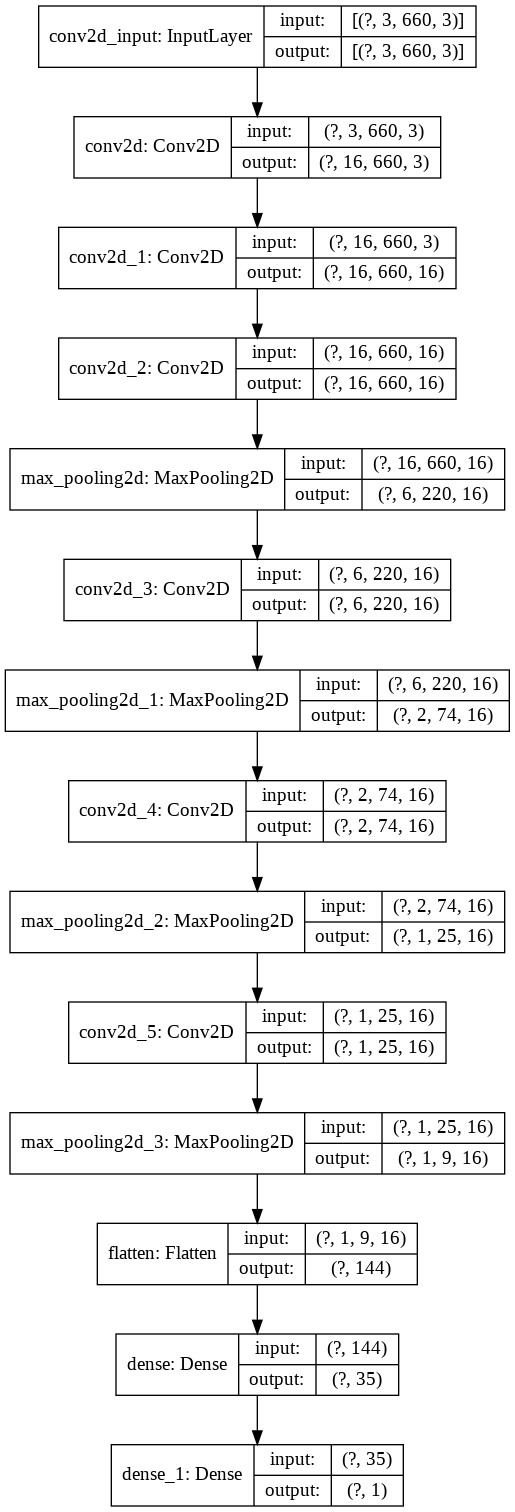

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(x=x_train_cnn, y=y_train_cnn, validation_split=0.33, batch_size=50, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
11/11 - 2s - loss: 0.4999 - accuracy: 0.5093 - val_loss: 0.4961 - val_accuracy: 0.5114
Epoch 2/10
11/11 - 1s - loss: 0.4622 - accuracy: 0.5112 - val_loss: 0.3818 - val_accuracy: 0.6667
Epoch 3/10
11/11 - 1s - loss: 0.3400 - accuracy: 0.6698 - val_loss: 0.3119 - val_accuracy: 0.6970
Epoch 4/10
11/11 - 1s - loss: 0.3415 - accuracy: 0.6586 - val_loss: 0.3614 - val_accuracy: 0.6402
Epoch 5/10
11/11 - 1s - loss: 0.3601 - accuracy: 0.6399 - val_loss: 0.3597 - val_accuracy: 0.6439
Epoch 6/10
11/11 - 1s - loss: 0.3493 - accuracy: 0.6511 - val_loss: 0.3448 - val_accuracy: 0.6553
Epoch 7/10
11/11 - 1s - loss: 0.3314 - accuracy: 0.6698 - val_loss: 0.3494 - val_accuracy: 0.6515
Epoch 8/10
11/11 - 1s - loss: 0.3307 - accuracy: 0.6698 - val_loss: 0.3370 - val_accuracy: 0.6629
Epoch 9/10
11/11 - 1s - loss: 0.3330 - accuracy: 0.6698 - val_loss: 0.3742 - val_accuracy: 0.6250
Epoch 10/10
11/11 - 1s - loss: 0.3718 - accuracy: 0.6269 - val_loss: 0.3409 - val_accuracy: 0.6591


In [ ]:
np.set_printoptions(precision=2)
prediction = np.hstack(model.predict(x_test.reshape((x_test.shape[0], 3, 5940//3//3, 3))))
# prediction = np.hstack(model.predict(encoderx.predict(x_test)))
# print(np.array((prediction>0.5, list(y_test))).T)
print([i[0] == i[1] for i in np.array((prediction>0.5, list(y_test))).T].count(True))
print([i[0] == i[1] for i in np.array((prediction>0.5, list(y_test))).T].count(False))

141
59


In [ ]:
prediction_tia = np.hstack(model.predict(x_tia.reshape((x_tia.shape[0], 3, 5940//3//3, 3))))
res = [i[0] == i[1] for i in np.array((prediction_tia>0.5, list(y_tia))).T]
print(res[:32].count(True), res[:32].count(False))
print(res[32:85].count(True), res[32:85].count(False))
print(res[85:135].count(True), res[85:135].count(False))
print(res[135:190].count(True), res[135:190].count(False))
print(prediction_tia > 0.5)

26 6
52 1
47 3
51 4
[ True  True  True  True  True  True  True  True  True False False  True
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
 False  True  True False  True 

In [ ]:

prediction_zero = np.hstack(model.predict(x_zero_rest.reshape((x_zero_rest.shape[0], 3, 5940//3//3, 3))))

good = np.count_nonzero(np.equal(prediction_zero > 0.5, y_zero_rest > 0.5))
bad = prediction_zero.shape[0] - good

print(good, bad)


74 206


## CNN

In [ ]:
x_train_cnn = x_train.reshape((x_train.shape[0], 3, x_train.shape[1]//3//3, 3))
y_train_cnn = y_train.reshape((y_train.shape[0], 1))

print(x_train_cnn.shape, y_train_cnn.shape)

(800, 3, 660, 3) (800, 1)


In [ ]:
num_filters = 16
filter_size = (9,9)
pool_size = (3,3)

model = Sequential()
model.add(Conv2D(num_filters, kernel_size=filter_size, activation=LR(), input_shape=(3, 660, 3), padding='same', data_format = 'channels_first'))
model.add(Conv2D(num_filters, kernel_size=filter_size, activation=LR(), padding='same'))
# model.add(Dropout(0.5))
model.add(Conv2D(num_filters, kernel_size=filter_size, activation=LR(), padding='same'))
model.add(MaxPooling2D(pool_size=pool_size, padding='same'))
model.add(Conv2D(num_filters, kernel_size=filter_size, activation=LR(), padding='same'))
model.add(MaxPooling2D(pool_size=pool_size, padding='same'))
model.add(Conv2D(num_filters, kernel_size=filter_size, activation=LR(), padding='same'))
model.add(MaxPooling2D(pool_size=pool_size, padding='same'))
model.add(Conv2D(num_filters, kernel_size=filter_size, activation=LR(), padding='same'))
model.add(MaxPooling2D(pool_size=pool_size, padding='same'))
model.add(Flatten())
model.add(Dense(35, activation=LR()))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 660, 3)        3904      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 660, 16)       3904      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 660, 16)       20752     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 220, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 220, 16)        20752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 74, 16)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 74, 16)         2

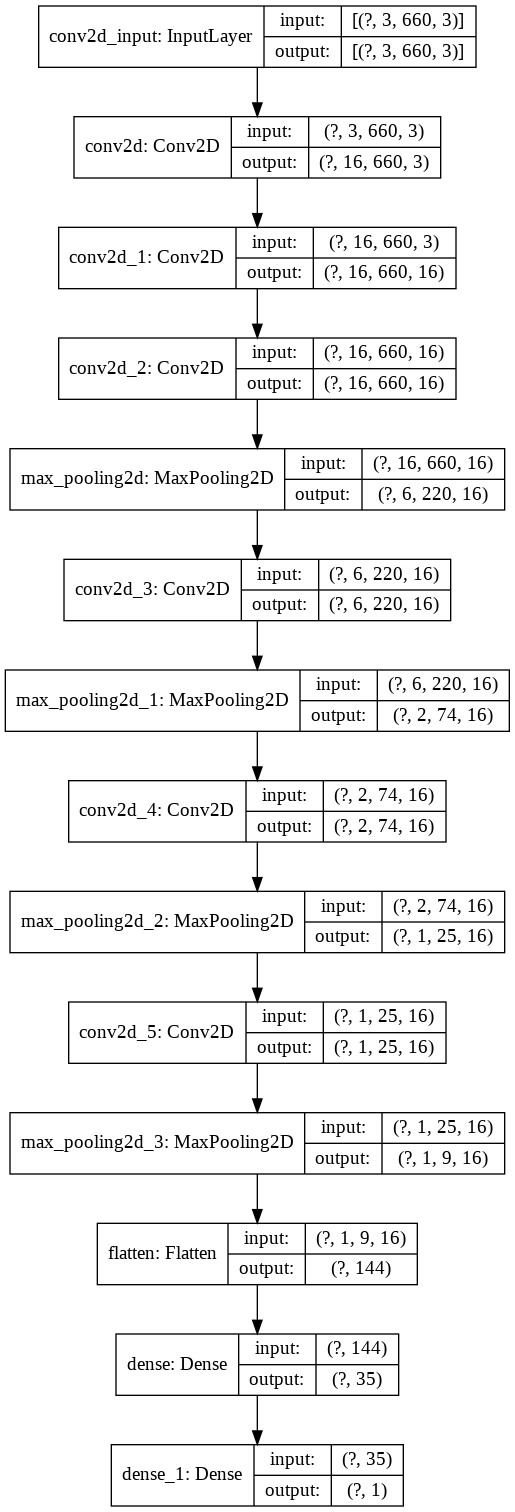

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(x=x_train_cnn, y=y_train_cnn, validation_split=0.33, batch_size=50, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
11/11 - 2s - loss: 0.4999 - accuracy: 0.5093 - val_loss: 0.4961 - val_accuracy: 0.5114
Epoch 2/10
11/11 - 1s - loss: 0.4622 - accuracy: 0.5112 - val_loss: 0.3818 - val_accuracy: 0.6667
Epoch 3/10
11/11 - 1s - loss: 0.3400 - accuracy: 0.6698 - val_loss: 0.3119 - val_accuracy: 0.6970
Epoch 4/10
11/11 - 1s - loss: 0.3415 - accuracy: 0.6586 - val_loss: 0.3614 - val_accuracy: 0.6402
Epoch 5/10
11/11 - 1s - loss: 0.3601 - accuracy: 0.6399 - val_loss: 0.3597 - val_accuracy: 0.6439
Epoch 6/10
11/11 - 1s - loss: 0.3493 - accuracy: 0.6511 - val_loss: 0.3448 - val_accuracy: 0.6553
Epoch 7/10
11/11 - 1s - loss: 0.3314 - accuracy: 0.6698 - val_loss: 0.3494 - val_accuracy: 0.6515
Epoch 8/10
11/11 - 1s - loss: 0.3307 - accuracy: 0.6698 - val_loss: 0.3370 - val_accuracy: 0.6629
Epoch 9/10
11/11 - 1s - loss: 0.3330 - accuracy: 0.6698 - val_loss: 0.3742 - val_accuracy: 0.6250
Epoch 10/10
11/11 - 1s - loss: 0.3718 - accuracy: 0.6269 - val_loss: 0.3409 - val_accuracy: 0.6591


In [ ]:
np.set_printoptions(precision=2)
prediction = np.hstack(model.predict(x_test.reshape((x_test.shape[0], 3, 5940//3//3, 3))))
# prediction = np.hstack(model.predict(encoderx.predict(x_test)))
# print(np.array((prediction>0.5, list(y_test))).T)
print([i[0] == i[1] for i in np.array((prediction>0.5, list(y_test))).T].count(True))
print([i[0] == i[1] for i in np.array((prediction>0.5, list(y_test))).T].count(False))

141
59


In [ ]:
prediction_tia = np.hstack(model.predict(x_tia.reshape((x_tia.shape[0], 3, 5940//3//3, 3))))
res = [i[0] == i[1] for i in np.array((prediction_tia>0.5, list(y_tia))).T]
print(res[:32].count(True), res[:32].count(False))
print(res[32:85].count(True), res[32:85].count(False))
print(res[85:135].count(True), res[85:135].count(False))
print(res[135:190].count(True), res[135:190].count(False))
print(prediction_tia > 0.5)

26 6
52 1
47 3
51 4
[ True  True  True  True  True  True  True  True  True False False  True
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
 False  True  True False  True 

In [ ]:

prediction_zero = np.hstack(model.predict(x_zero_rest.reshape((x_zero_rest.shape[0], 3, 5940//3//3, 3))))

good = np.count_nonzero(np.equal(prediction_zero > 0.5, y_zero_rest > 0.5))
bad = prediction_zero.shape[0] - good

print(good, bad)


74 206


# SAVE model

In [ ]:
model.save("/content/drive/My Drive/Colab Notebooks/TFG/models/model1.h5")

In [ ]:
model_gan.save("/content/drive/My Drive/Colab Notebooks/TFG/models/model1-gan.h5")

# TESTS

## CNN

In [ ]:
x_train_cnn = x_train.reshape((x_train.shape[0], 3, x_train.shape[1]//3//3, 3))
x_test_cnn = x_test.reshape((x_test.shape[0], 3, x_test.shape[1]//3//3, 3))

y_train_cnn = y_train.reshape((y_train.shape[0], 1))
y_test_cnn = y_test.reshape((y_test.shape[0], 1))

print(x_train_cnn.shape, y_train_cnn.shape)

(720, 3, 660, 3) (720, 1)


In [ ]:
def create_model(filter_size=(9,9), num_filters=16):
  pool_size = (3,3)

  model = Sequential()
  model.add(Conv2D(num_filters, kernel_size=filter_size, activation=LR(), input_shape=(3, 660, 3), padding='same', data_format = 'channels_first'))
  model.add(Conv2D(num_filters, kernel_size=filter_size, activation=LR(), padding='same'))
  # model.add(Dropout(0.5))
  model.add(Conv2D(num_filters, kernel_size=filter_size, activation=LR(), padding='same'))
  model.add(MaxPooling2D(pool_size=pool_size, padding='same'))
  model.add(Conv2D(num_filters, kernel_size=filter_size, activation=LR(), padding='same'))
  model.add(MaxPooling2D(pool_size=pool_size, padding='same'))
  model.add(Conv2D(num_filters, kernel_size=filter_size, activation=LR(), padding='same'))
  model.add(MaxPooling2D(pool_size=pool_size, padding='same'))
  model.add(Conv2D(num_filters, kernel_size=filter_size, activation=LR(), padding='same'))
  model.add(MaxPooling2D(pool_size=pool_size, padding='same'))
  model.add(Flatten())
  model.add(Dense(35, activation=LR()))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

  return model

In [ ]:
num_filters = [8, 16, 32]
filter_size = [(5,5), (9,9), (14, 14)]
y_true = y_test
x_tia_cnn = x_tia.reshape((x_tia.shape[0], 3, x_tia.shape[1]//3//3, 3))
x_test_tia_cnn = x_test_cnn

reps = 5
confusion_matrices_cnn = []
cnn_precision_means = []
cnn_recall_means = []
for u,v in itertools.product(num_filters, filter_size):
  stats = []
  for i in range(reps):
    K.clear_session()
    print(u,v)
    x_train_cnn, y_train_cnn = shuffle(x_train_cnn, y_train_cnn)
    model_cnn = create_model(filter_size=v, num_filters = u)
    model_cnn.fit(x=x_train_cnn, y=y_train_cnn, batch_size=50, epochs=20, shuffle=True, verbose=0)

    y_pred = model_cnn.predict(x_test_tia_cnn)

    confusion_matrices_cnn.append(confusion_matrix(y_true, y_pred > 0.5))

    stats.append(precision_recall_fscore_support(y_true, y_pred > 0.5, average='binary'))
  cnn_precision_means.append(np.mean([i[0] for i in stats]))
  cnn_recall_means.append(np.mean([i[1] for i in stats]))

8 (5, 5)
8 (5, 5)
8 (5, 5)
8 (5, 5)
8 (5, 5)
8 (9, 9)
8 (9, 9)
8 (9, 9)
8 (9, 9)
8 (9, 9)
8 (14, 14)
8 (14, 14)
8 (14, 14)
8 (14, 14)
8 (14, 14)
16 (5, 5)
16 (5, 5)
16 (5, 5)
16 (5, 5)
16 (5, 5)
16 (9, 9)
16 (9, 9)
16 (9, 9)
16 (9, 9)
16 (9, 9)
16 (14, 14)
16 (14, 14)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


16 (14, 14)
16 (14, 14)
16 (14, 14)
32 (5, 5)
32 (5, 5)
32 (5, 5)
32 (5, 5)
32 (5, 5)
32 (9, 9)
32 (9, 9)
32 (9, 9)
32 (9, 9)
32 (9, 9)
32 (14, 14)
32 (14, 14)
32 (14, 14)
32 (14, 14)
32 (14, 14)


8 (5, 5)
[[399  81]
 [ 99 321]]
8 (9, 9)
[[397  83]
 [121 299]]
8 (14, 14)
[[365 115]
 [127 293]]
16 (5, 5)
[[403  77]
 [128 292]]
16 (9, 9)
[[411  69]
 [212 208]]
16 (14, 14)
[[401  79]
 [292 128]]
32 (5, 5)
[[341 139]
 [153 267]]
32 (9, 9)
[[413  67]
 [343  77]]
32 (14, 14)
[[297 183]
 [261 159]]


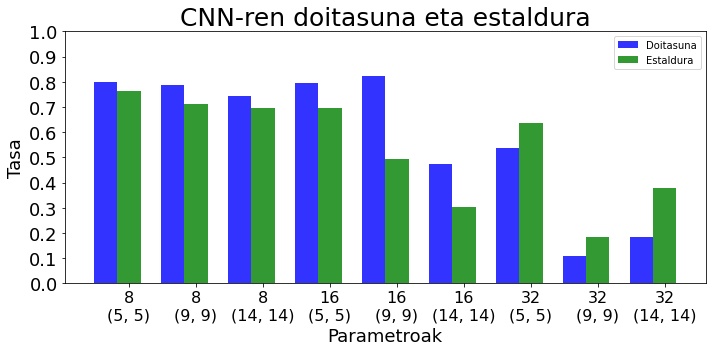

[0.7990446704997789, 0.7859703855466568, 0.7452515640766741, 0.7943397813288477, 0.8226192376028003, 0.472013422818792, 0.5378868506512069, 0.10845070422535212, 0.1859259259259259]
[0.7642857142857142, 0.7119047619047618, 0.6976190476190476, 0.6952380952380952, 0.49523809523809526, 0.30476190476190473, 0.6357142857142858, 0.18333333333333332, 0.37857142857142856]


In [ ]:
i = 0
for u,v in itertools.product(num_filters, filter_size):
  print(u,v)
  print(np.sum(confusion_matrices_cnn[i*reps:reps*(i+1)], axis=0))
  i += 1

plt.rcParams['figure.figsize'] = [10, 5]
cnn_objects = ('8\n(5, 5)', '8\n(9, 9)', '8\n(14, 14)', '16\n(5, 5)', '16\n(9, 9)',
           '16\n(14, 14)', '32\n(5, 5)', '32\n(9, 9)', '32\n(14, 14)')

# data to plot
n_groups = len(cnn_precision_means)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, cnn_precision_means, bar_width,
alpha=opacity,
color='b',
label='Doitasuna')

rects2 = plt.bar(index + bar_width, cnn_recall_means, bar_width,
alpha=opacity,
color='g',
label='Estaldura')

plt.xlabel('Parametroak', fontsize=18)
plt.ylabel('Tasa', fontsize=18)
plt.title('CNN-ren doitasuna eta estaldura', fontsize=25)
plt.xticks(index + bar_width, cnn_objects, fontsize=16)
plt.yticks(np.linspace(0, 1, 11), fontsize=18)
plt.legend()

plt.tight_layout()
plt.show()

print(cnn_precision_means)
print(cnn_recall_means)

## GAN

In [ ]:

def fit_gan(X_train, noise_shape=(200,), epochs=250):
  #
  # GENERATOR
  #
  K.clear_session()
  seq2 = []

  increase_rate = 1.5
  input_size = x_train.shape[1]
  dim = int(noise_shape[0]*increase_rate)
  seq2.append(Dense(dim, input_shape = noise_shape))
  # seq2.append(LR())
  seq2.append(Dropout(0.5))

  while dim < input_size:
    # print("Decoding", dim)
    seq2.append(Dense(dim))
    # seq2.append(LR())
    seq2.append(Dropout(0.5))
    dim = int(dim*increase_rate)
    
  seq2.append(Dense(input_size))
  # seq2.append(Activation("tanh"))
  # seq2.append(Reshape(input_size))
  # print(seq2)

  generated = Sequential(seq2)

  # generated.summary()

  noise = Input(shape=noise_shape)
  img = generated(noise)

  generator = Model(noise, img)


  #
  # DISCRIMINATOR
  #


  discriminated = Sequential([
                              Dense(input_size, input_dim=input_size, activation=LR()),
                              Dense(input_size//2, activation=LR()),
                              Dense(input_size//4, activation=LR()),
                              Dense(input_size//8, activation=LR()),
                              Dense(input_size//16, activation=LR()),
                              Dense(35, activation=LR()),
                              Dense(1, activation='sigmoid')
  ])
  # discriminated.summary()

  img = Input(shape=input_size)
  validity = discriminated(img)

  discriminator = Model(img, validity)
  discriminator.trainable = True

  #
  # GENERAL
  #

  optimizer = Adam(0.0002, 0.5)

  # Build and compile the discriminator
  discriminator.compile(loss='binary_crossentropy',
      optimizer=optimizer,
      metrics=['accuracy'])

  # Build and compile the generator
  generator.compile(loss='mean_absolute_error', optimizer=optimizer)

  # The generator takes noise as input and generated imgs
  z = Input(shape=noise_shape)
  img = generator(z)

  # The valid takes generated images as input and determines validity
  valid = discriminator(img)

  # The combined model  (stacked generator and discriminator) takes
  # noise as input => generates images => determines validity
  combined = Model(z, valid)
  combined.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  batch_size = noise_shape[0]

  half_batch = int(batch_size / 2)

  for epoch in range(epochs):

    # ---------------------
    #  Train Discriminator
    # ---------------------

    # Select a random half batch of images
    idx = np.random.randint(0, X_train.shape[0], half_batch)
    imgs = X_train[idx]

    noise = np.random.normal(0, 1, (half_batch, noise_shape[0]))

    # Generate a half batch of new images
    gen_imgs = generator.predict(noise)

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


    # ---------------------
    #  Train Generator
    # ---------------------

    noise = np.random.normal(0, 1, (batch_size, noise_shape[0]))

    # The generator wants the discriminator to label the generated samples
    # as valid (ones)
    valid_y = np.array([1] * batch_size)

    # Train the generator
    g_loss = combined.train_on_batch(noise, valid_y)

    # Plot the progress
    # print ("{} [D loss: {:2.2f}, acc.: {:2.2f}] [G loss: {:2.2f}]".format(epoch, d_loss[0], 100*d_loss[1], g_loss[0]))
    # if d_loss[1] > 0.94:
    #   print ("{} [D loss: {:2.2f}, acc.: {:2.2f}] [G loss: {:2.2f}]".format(epoch, d_loss[0], 100*d_loss[1], g_loss[0]))
    #   break

  return (generator, discriminator)

In [ ]:
def generate_data(x_train, y_train, model, train_size=200, noise_shape=(200,), epochs_gan=250, gen_data=500):
  K.clear_session()
  X_train, Y_train = shuffle(x_train, y_train)
  generator, _ = fit_gan(X_train[:train_size], noise_shape, epochs_gan)

  x_train_gan = generator.predict(np.random.normal(0, 1, (gen_data, noise_shape[0])))
  y_train_gan = model.predict(x_train_gan)

  x_train_gan = np.concatenate((X_train[:train_size], x_train_gan))
  y_train_gan = np.concatenate((Y_train[:train_size].reshape(Y_train[:train_size].shape[0], 1), y_train_gan))

  return x_train_gan, y_train_gan

In [ ]:
def create_model(input_size):
  
  model_gan = Sequential([
                      Dense(input_size, input_dim=input_size, activation=LR()),
                      Dense(input_size//2, activation=LR()),
                      Dense(input_size//4, activation=LR()),
                      Dense(input_size//8, activation=LR()),
                      Dense(input_size//16, activation=LR()),
                      Dense(35, activation=LR()),
                      Dense(1, activation='sigmoid')
  ])

  model_gan.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

  return model_gan

In [ ]:
epochs = [100]
batch_size = [100]
train_size = [300, 500, 700]
noise_shape = [256, 512, 1024]
gen_data = [250, 500, 1000]

seed = 42



# Create the model
# f = lambda train_size=200,noise_shape=(200,): 
# f(100)


In [ ]:
reps = 5
confusion_matrices = []
gan_precision_means = []
gan_recall_means = []
for u,v in itertools.product(train_size, noise_shape):
  stats = []
  for i in range(reps):
    K.clear_session()
    print(u,v)
    x_train_gan, y_train_gan = generate_data(x_train, y_train, model, train_size=u, noise_shape=(v,))
    model_gan = create_model(x_train_gan.shape[1])
    model_gan.fit(x=x_train_gan, y=y_train_gan, validation_split=0.33, batch_size=50, epochs=30, shuffle=True, verbose=0)

    y_true, y_pred = np.concatenate((y_test, y_tia)), model_gan.predict(np.concatenate((x_test, x_tia)))

    confusion_matrices.append(confusion_matrix(y_true, y_pred > 0.5))

    stats.append(precision_recall_fscore_support(y_true, y_pred > 0.5, average='binary'))
  gan_precision_means.append(np.mean([i[0] for i in stats]))
  gan_recall_means.append(np.mean([i[1] for i in stats]))

300 256
300 256
300 256
300 256
300 256
300 512
300 512
300 512
300 512
300 512
300 1024
300 1024
300 1024
300 1024
300 1024
500 256
500 256
500 256
500 256
500 256
500 512
500 512
500 512
500 512
500 512
500 1024
500 1024
500 1024
500 1024
500 1024
700 256
700 256
700 256
700 256
700 256
700 512
700 512
700 512
700 512
700 512
700 1024
700 1024
700 1024
700 1024
700 1024


300 256
[[413  92]
 [912 433]]
300 512
[[395 110]
 [922 423]]
300 1024
[[400 105]
 [934 411]]
500 256
[[429  76]
 [986 359]]
500 512
[[427  78]
 [978 367]]
500 1024
[[436  69]
 [997 348]]
700 256
[[443  62]
 [979 366]]
700 512
[[441  64]
 [969 376]]
700 1024
[[443  62]
 [984 361]]


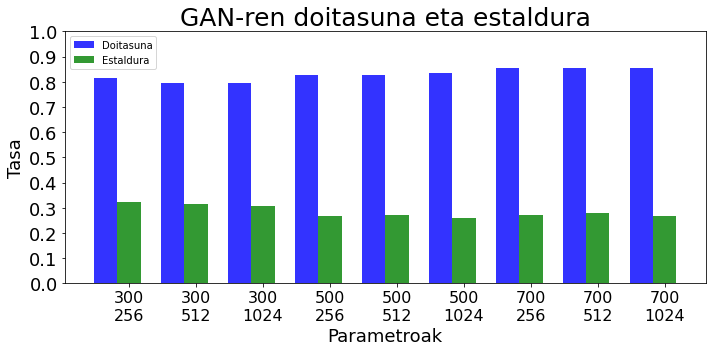

[0.8131864559204607, 0.7934734356552539, 0.7954584019307994, 0.8254970449591355, 0.825610976376549, 0.8347422897208245, 0.8563298887449398, 0.8550726868484275, 0.8536667954847195]
[0.32193308550185873, 0.3144981412639405, 0.30557620817843867, 0.266914498141264, 0.27286245353159855, 0.2587360594795539, 0.2721189591078067, 0.2795539033457249, 0.2684014869888476]


In [ ]:
i = 0
for u,v in itertools.product(train_size, noise_shape):
  print(u,v)
  print(np.sum(confusion_matrices[i*reps:reps*(i+1)], axis=0))
  i += 1

plt.rcParams['figure.figsize'] = [10, 5]
gan_objects = ('300\n256', '300\n512', '300\n1024', '500\n256', '500\n512',
               '500\n1024', '700\n256', '700\n512', '700\n1024')

# data to plot
n_groups = len(gan_precision_means)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, gan_precision_means, bar_width,
alpha=opacity,
color='b',
label='Doitasuna')

rects2 = plt.bar(index + bar_width, gan_recall_means, bar_width,
alpha=opacity,
color='g',
label='Estaldura')

plt.xlabel('Parametroak', fontsize=18)
plt.ylabel('Tasa', fontsize=18)
plt.title('GAN-ren doitasuna eta estaldura', fontsize=25)
plt.xticks(index + bar_width, gan_objects, fontsize=16)
plt.yticks(np.linspace(0, 1, 11), fontsize=18)
plt.legend()

plt.tight_layout()
plt.show()

print(gan_precision_means)
print(gan_recall_means)

## Common NN (feed forward)

In [ ]:
def create_model(optimizer='nadam', learning_rate=0.0001, dropout_rate=0.5):
    # Clean
    K.clear_session()
    
    optimizer = keras.optimizers.get(optimizer)
    optimizer.learning_rate.assign(learning_rate)
    input_size = x_train.shape[1]
    model = Sequential([
                        Dense(input_size, input_dim=input_size, activation=LR()),
                        Dense(input_size//2, activation=LR()),
                        Dense(input_size//4, activation=LR()),
                        Dropout(dropout_rate),
                        Dense(input_size//8, activation=LR()),
                        Dropout(dropout_rate),
                        Dense(input_size//16, activation=LR()),
                        Dropout(dropout_rate),
                        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

### Hyper-parameter optimization

In [ ]:
optimizers = ['adam', 'nadam', 'adamax', 'RMSprop']
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [150, 100, 75, 50]
epochs = [10, 20, 30]

seed = 42


In [ ]:
results = []
reps = 5
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
for i in range(reps):
  # Create the model
  model = KerasClassifier(build_fn=create_model, verbose=0)

  # Make a dictionary of the grid search parameters
  param_grid = dict(optimizer=optimizers, learning_rate=learning_rates, dropout_rate=dropout_rates, batch_size=batch_sizes, epochs=epochs)

  # Build and fit the GridSearchCV
  grid = GridSearchCV(estimator=model, param_grid=param_grid,
                      cv=KFold(random_state=seed, shuffle=True), verbose=0)

  grid_results = grid.fit(x_train, y_train)
  results.append(grid_results)

  # Summarize the results in a readable format
  print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

  # means = grid_results.cv_results_['mean_test_score']
  # stds = grid_results.cv_results_['std_test_score']
  # params = grid_results.cv_results_['params']

  # for mean, stdev, param in zip(means, stds, params):
  #     print('{0} ({1}) with: {2}'.format(mean, stdev, param))

NameError: ignored

### Tests

In [ ]:
train_size = [300, 500, 700]
dropout = [0.0, 0.3, 0.6]
if mugimendua == 0:
  y_true = np.concatenate((y_test, y_tia))
  x_test_ff = np.concatenate((x_test, x_tia))
elif mugimendua == 1:
  y_true = y_test
  x_test_ff = x_test

reps = 5
confusion_matrices_ff = []
ff_precision_means = []
ff_recall_means = []
for u,v in itertools.product(train_size, dropout):
  stats = []
  for i in range(reps):
    K.clear_session()
    print(u,v)
    x_train_ff, y_train_ff = shuffle(x_train, y_train)
    model_ff = create_model(optimizer='nadam', dropout_rate=v)
    model_ff.fit(x=x_train_ff[:u], y=y_train_ff[:u], batch_size=50, epochs=30, shuffle=True, verbose=0)

    y_pred = model_ff.predict(x_test_ff)

    confusion_matrices_ff.append(confusion_matrix(y_true, y_pred > 0.5))

    stats.append(precision_recall_fscore_support(y_true, y_pred > 0.5, average='binary'))
  ff_precision_means.append(np.mean([i[0] for i in stats]))
  ff_recall_means.append(np.mean([i[1] for i in stats]))

300 0.0
300 0.0
300 0.0
300 0.0
300 0.0
300 0.3
300 0.3
300 0.3
300 0.3
300 0.3
300 0.6
300 0.6
300 0.6
300 0.6
300 0.6
500 0.0
500 0.0
500 0.0
500 0.0
500 0.0
500 0.3
500 0.3
500 0.3
500 0.3
500 0.3
500 0.6
500 0.6
500 0.6
500 0.6
500 0.6
700 0.0
700 0.0
700 0.0
700 0.0
700 0.0
700 0.3
700 0.3
700 0.3
700 0.3
700 0.3
700 0.6
700 0.6
700 0.6
700 0.6
700 0.6


300 0.0
[[374 141]
 [508 927]]
300 0.3
[[397 118]
 [526 909]]
300 0.6
[[381 134]
 [560 875]]
500 0.0
[[424  91]
 [461 974]]
500 0.3
[[400 115]
 [456 979]]
500 0.6
[[400 115]
 [586 849]]
700 0.0
[[ 421   94]
 [ 367 1068]]
700 0.3
[[407 108]
 [464 971]]
700 0.6
[[405 110]
 [492 943]]


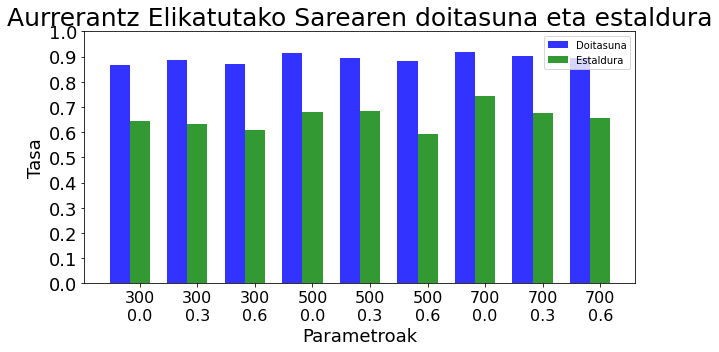

[0.8679250969663741, 0.8854474143401063, 0.8688546412448771, 0.9143163559182794, 0.8947717071027128, 0.8817629135888293, 0.9188215950070833, 0.9005580398474027, 0.8959118351457448]
[0.6459930313588849, 0.6334494773519164, 0.6097560975609756, 0.6787456445993032, 0.6822299651567943, 0.591637630662021, 0.7442508710801394, 0.6766550522648084, 0.6571428571428571]


In [ ]:
i = 0
for u,v in itertools.product(train_size, dropout):
  print(u,v)
  print(np.sum(confusion_matrices_ff[i*reps:reps*(i+1)], axis=0))
  i += 1

plt.rcParams['figure.figsize'] = [10, 5]
ff_objects = ('300\n0.0', '300\n0.3', '300\n0.6', '500\n0.0', '500\n0.3', '500\n0.6',
              '700\n0.0', '700\n0.3', '700\n0.6')

# data to plot
n_groups = len(ff_precision_means)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, ff_precision_means, bar_width,
alpha=opacity,
color='b',
label='Doitasuna')

rects2 = plt.bar(index + bar_width, ff_recall_means, bar_width,
alpha=opacity,
color='g',
label='Estaldura')

plt.xlabel('Parametroak', fontsize=18)
plt.ylabel('Tasa', fontsize=18)
plt.title('Aurrerantz Elikatutako Sarearen doitasuna eta estaldura', fontsize=25)
plt.xticks(index + bar_width, ff_objects, fontsize=16)
plt.yticks(np.linspace(0, 1, 11), fontsize=18)
plt.legend()

plt.tight_layout()
plt.show()

print(ff_precision_means)
print(ff_recall_means)

## Autoencoder

In [ ]:
def fit_ae(x_train, encoding_dim = 100):
  K.clear_session()
  # Model Construction

  input_size = x_train.shape[1:]

  seq = []
  dim = x_test.shape[1]
  increase = 2
  # seq.append(Flatten(input_shape=input_size))

  while dim > encoding_dim:
    # print("Encoding", dim)
    seq.append(Dense(dim))
    # seq.append(LR())
    seq.append(Dropout(0.5))
    dim //= increase
  seq.append(Dense(encoding_dim))
  # seq.append(LR())
  # print(seq)

  encoder = Sequential(seq)

  seq2 = []

  dim = int(dim*increase)
  seq2.append(Dense(dim, input_shape = (encoding_dim,)))
  # seq2.append(LR())
  seq2.append(Dropout(0.5))

  while dim < input_size[0]:
    # print("Decoding", dim)
    seq2.append(Dense(dim))
    # seq2.append(LR())
    seq2.append(Dropout(0.5))
    dim = int(dim*increase)
    
  seq2.append(Dense(input_size[0]))
  # seq2.append(Activation("tanh"))
  # seq2.append(Reshape(input_size))
  # print(seq2)

  decoder = Sequential(seq2)

  # TRAIN

  img = Input(shape = input_size)
  latent_vector = encoder(img)
  output = decoder(latent_vector)
  autoencoder = Model(inputs = img, outputs = output)

  encoderx = Model(inputs = img, outputs = latent_vector)

  autoencoder.compile(optimizer='nadam', loss='mean_absolute_error', metrics=['accuracy'])

  autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=15*len(seq),
                validation_split=0.33,
                shuffle=True, verbose=0)

  return (encoderx, decoder)

In [ ]:
def create_model(encoding_dim = 1000):
  input_size = encoding_dim
  model_autoencoder = Sequential([
                      Dense(input_size, input_dim=input_size, activation=LR()),
                      Dense(input_size//2, activation=LR()),
                      Dense(input_size//4, activation=LR()),
                      Dense(input_size//8, activation=LR()),
                      Dense(input_size//16, activation=LR()),
                      Dense(35, activation=LR()),
                      Dense(1, activation='sigmoid')
  ])
  model_autoencoder.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
  return model_autoencoder

In [ ]:
enconding_dim = [200, 500, 1000]

In [ ]:
reps = 5
confusion_matrices_ae = []
ae_precision_means = []
ae_recall_means = []
for u in enconding_dim:
  stats = []
  for i in range(reps):
    K.clear_session()
    print(u)
    encoder, _ = fit_ae(x_train, u)
    x_train_ae, y_train_ae = encoder.predict(x_train), y_train
    model_ae = create_model(u)
    model_ae.fit(x=x_train_ae, y=y_train_ae, validation_split=0.33, batch_size=100, epochs=20, shuffle=True, verbose=0)

    y_true, y_pred = y_test, model_ae.predict(encoder.predict(x_test))

    confusion_matrices_ae.append(confusion_matrix(y_true, y_pred > 0.5))

    stats.append(precision_recall_fscore_support(y_true, y_pred > 0.5, average='binary'))
  ae_precision_means.append(np.mean([i[0] for i in stats]))
  ae_recall_means.append(np.mean([i[1] for i in stats]))

200
200
200
200
200
500
500
500
500
500
1000
1000
1000
1000
1000


200
[[262 218]
 [166 254]]
500
[[305 175]
 [133 287]]
1000
[[336 144]
 [159 261]]


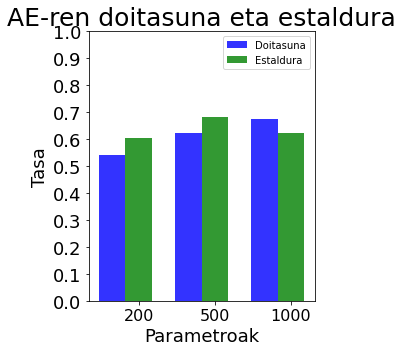

[0.5404107591709171, 0.6242337303109242, 0.6763233642751716]
[0.6047619047619047, 0.6833333333333333, 0.6214285714285714]


In [ ]:
i = 0
for u in enconding_dim:
  print(u)
  print(np.sum(confusion_matrices_ae[i*reps:reps*(i+1)], axis=0))
  i += 1

plt.rcParams['figure.figsize'] = [5, 5]
ae_objects = ('200', '500', '1000')

# data to plot
n_groups = len(ae_precision_means)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, ae_precision_means, bar_width,
alpha=opacity,
color='b',
label='Doitasuna')

rects2 = plt.bar(index + bar_width, ae_recall_means, bar_width,
alpha=opacity,
color='g',
label='Estaldura')

plt.xlabel('Parametroak', fontsize=18)
plt.ylabel('Tasa', fontsize=18)
plt.title('AE-ren doitasuna eta estaldura', fontsize=25)
plt.xticks(index + bar_width, ae_objects, fontsize=16)
plt.yticks(np.linspace(0, 1, 11), fontsize=18)
plt.legend()

plt.tight_layout()
plt.show()
plt.rcParams['figure.figsize'] = [10, 5]

print(ae_precision_means)
print(ae_recall_means)